# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [38]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [39]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Reading

How many years of data are logged in our dataset? 

In [40]:
count = len(df["YEAR"].unique())
print(count)

14


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [41]:
MI = df[df["STATE"] == "MICHIGAN"]
OH = df[df["STATE"] == "OHIO"]
ohio_mean = OH["AVG_READING_4_SCORE"].mean()
michigan_mean = MI["AVG_READING_4_SCORE"].mean()
if ohio_mean > michigan_mean:
    print('Ohio has the higher average of Grade 4 Reading across all years.')

else: print('Michigan has the higher average of Grade 4 Reading across all years.')


Ohio has the higher average of Grade 4 Reading across all years.


Find the average for your outcome score across all states in 2019

In [42]:
states_2019 = df[df["YEAR"] == 2019]
states_2019.groupby(["STATE", "YEAR"])["AVG_READING_4_SCORE"].mean().reset_index()

,STATE,YEAR,AVG_READING_4_SCORE
0,ALABAMA,2019,212.0
1,ALASKA,2019,204.0
2,ARIZONA,2019,216.0
3,ARKANSAS,2019,215.0
4,CALIFORNIA,2019,216.0
5,COLORADO,2019,225.0
6,CONNECTICUT,2019,224.0
7,DELAWARE,2019,218.0
8,DISTRICT_OF_COLUMBIA,2019,214.0
9,DODEA,2019,235.0


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [43]:
states = df.groupby("STATE")
states["AVG_READING_4_SCORE"].max().reset_index()

,STATE,AVG_READING_4_SCORE
0,ALABAMA,220.0
1,ALASKA,214.0
2,ARIZONA,216.0
3,ARKANSAS,219.0
4,CALIFORNIA,216.0
5,COLORADO,227.0
6,CONNECTICUT,230.0
7,DELAWARE,226.0
8,DISTRICT_OF_COLUMBIA,214.0
9,DODEA,235.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

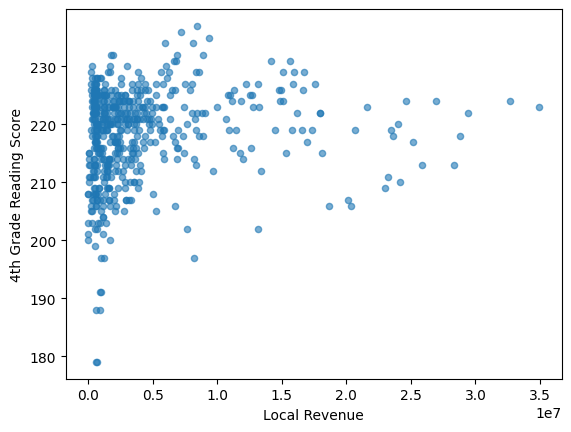

In [44]:
df.plot.scatter(x='LOCAL_REVENUE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Local Revenue')
plt.ylabel('4th Grade Reading Score')

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

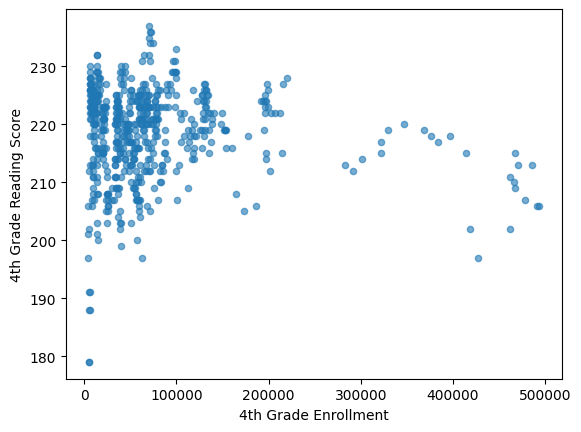

In [45]:
df.plot.scatter(x='ENROLL_4', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Enrollment')
plt.ylabel('4th Grade Reading Score')

**Visualization 3**

<Axes: xlabel='AVG_READING_4_SCORE', ylabel='AVG_MATH_4_SCORE'>

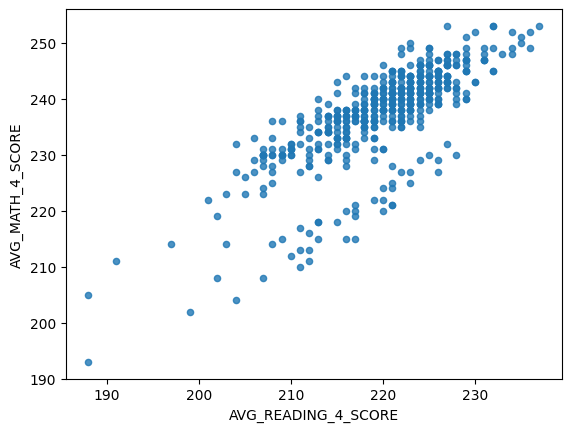

In [46]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.8)

**Visualization 4**

<Axes: xlabel='AVG_READING_4_SCORE', ylabel='AVG_READING_8_SCORE'>

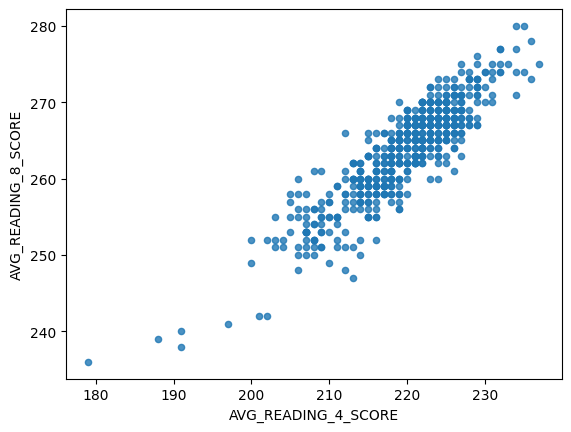

In [47]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_READING_8_SCORE', alpha=0.8)

There is a very weak correlation between Local Revenue and the 4th Grade Reading Score, as well as between 4th Grade Enrollment and the Average 4th Grade Reading Score. However, there is a moderate correlation between the Average 4th Grade Reading Score and the Average 4th Grade Math Score, as well as a strong correlation between the Average 4th Grade Reading Score and the Average 8th Grade Reading Score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [51]:
# import your sklearn class 
from sklearn.linear_model import LinearRegression

In [52]:
# create your model here
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [55]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

-36.827343783317986
[0.43761893 0.57769629]


2.3985729784894896

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

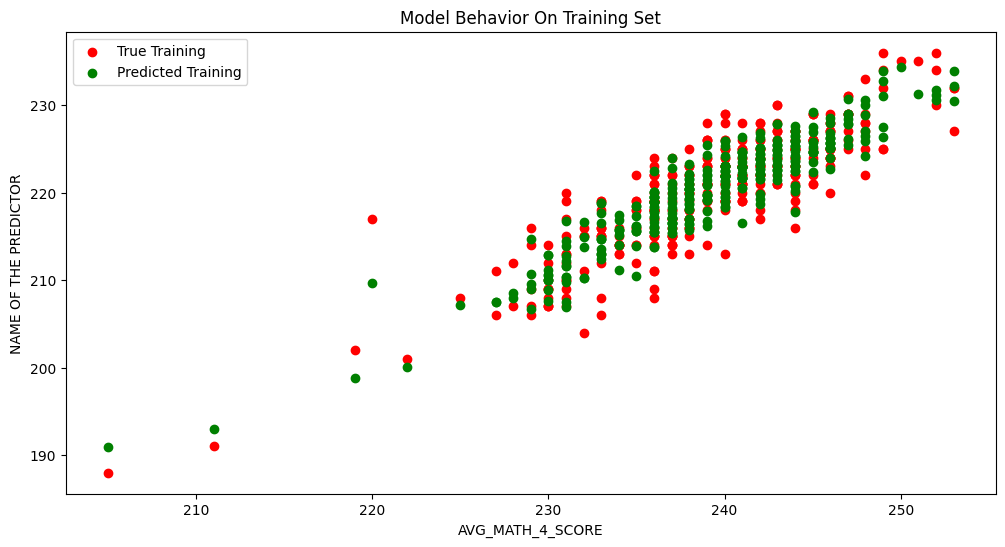

In [56]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Testing Set')

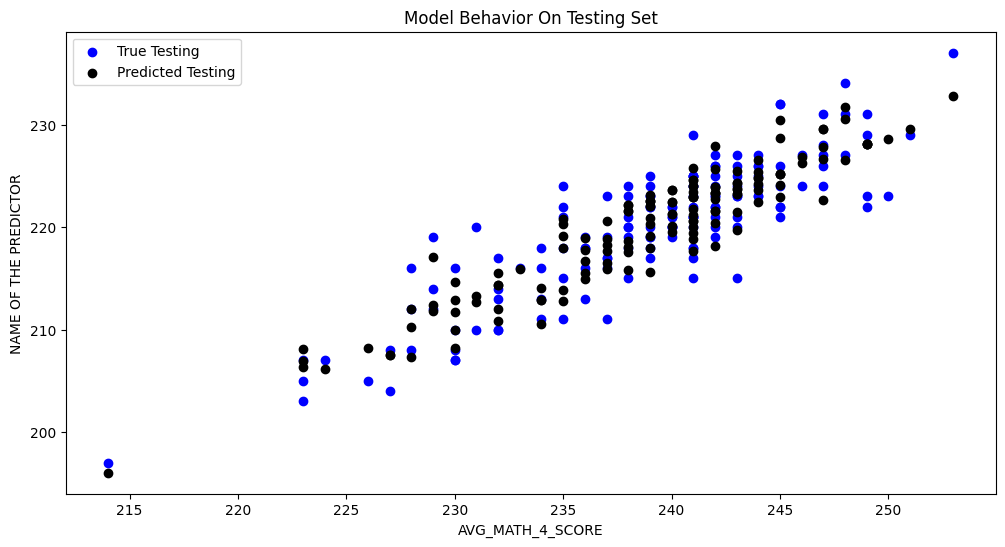

In [57]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True Testing','Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Testing Set")

<h2> Summary </h2>

**After cleaning and performing an EDA on the datsset, as well as investigating the relationship between my chosen response variable (Average 4th Grade Reading Score) and multiple predictors using visualizations, I was able to create a model that predicts new data that may be added to the dataset in the future. For my predictors, I chose the Average 8th Grade Reading Score and Average 4th Grade Math Score, I they had the strongest correlation with my response variable. It seems like my model did better with the training set than the testing set, but performed well overall and I don't think that it is overfit at all.**